# Buying Strategy in BS model

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Binomial Tree

### a) Generate all paths

In [119]:
N = 6
T = 1 # time to maturity
sigma = 0.5 # volatility of stock price
# r = 0.1
r = 0.5 * (sigma**2) # risk-free rate
S0 = 1 # initial stock price
def binomial_GBM(T, N, r, sigma, S0):
    dt = T / N
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d) / (u-d) # risk neutral prability for option pricing
    
    # stock price dynamics
    stock_price = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_price[j,i] = (d**j) * (u**(i-j)) * S0
    return stock_price

tree = binomial_GBM(T, N, r, sigma, S0)
# print('Step Number=6: \n', np.round(tree,5))

In [120]:
# convert binomial tree to all possible paths
from itertools import product
a = np.array(list(product((0, 1), repeat=N)))
a = np.c_[[0] * (2**N), a]
a = a.cumsum(axis=1)
b = np.choose(a,tree)
stock_paths1 = b[:,1:]
# print('All possible price paths: \n', np.round(b, 4))

In [121]:
# minimum price during the period
min_price1 = stock_paths1.min(axis=1)
# print('Min price: \n', np.round(min_price, 4))

In [122]:
# find optimal buying strategy
import scipy.optimize as sco
P = stock_paths1
m = min_price1

# ##############################################################################################
# # Minimize expected regret
# def min_regret(w):
#     w = np.array(w)
#     return np.sum(((P*w).sum(axis=1) / m)) + (sum(w)-1)**4
# # constraints：sum of weights are 1
# cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})
# # boundaries：each weight is bewtween 0 and 1
# bnds = tuple((0,1) for j in range(N))
# # guess initial weights
# ini = np.array([1/N] * N)
# # implement function
# result1 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# strategy1 = result1['x'].round(4)
# print('Min Expected Regret: \n', strategy1)

In [123]:
# ##############################################################################################
# # Minimize max of regret
# def min_regret(w):
#     w = np.array(w)
#     return ((P*w).sum(axis=1) / m).max()
# # constraints：sum of weights are 1
# cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})
# # boundaries：each weight is bewtween 0 and 1
# bnds = tuple((0,1) for j in range(N))
# # guess initial weights
# ini = np.array([1/N] * N)
# # implement function
# result2 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# strategy2 = result2['x'].round(4)
# print('Min Max Regret: \n', strategy2)

### b) Minimizing function

In [124]:
# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P*w).sum(axis=1) / m).std()

# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))

# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])

# implement function
result3 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result3)
strategy3 = result3['x'].round(4)
print('Min Std Regret for 50% Vol: \n', strategy3)

Min Std Regret for 50% Vol: 
 [0.143  0.1908 0.1662 0.1662 0.1908 0.143 ]


In [125]:
# regret
regret = ((P*strategy3).sum(axis=1) / m).round(4)
# print('All possible regret: \n', regret)

### c) Plot for optimal strategy

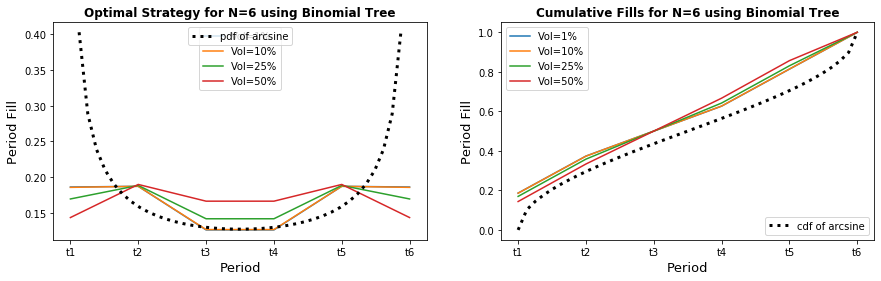

In [342]:
from itertools import accumulate
# Optimal Strategy for N=6

# min std fills
a1 = [0.1863, 0.1873, 0.1263, 0.1263, 0.1873, 0.1863]
b1 = [0.1858, 0.1873, 0.1268, 0.1268, 0.1873, 0.1858]
c1 = [0.1696, 0.1885, 0.1419, 0.1419, 0.1885, 0.1696]
d1 = [0.1436, 0.1899, 0.1665, 0.1665, 0.1899, 0.1436]
data1 = {'Vol=1%': a1,
       'Vol=10%': b1,
       'Vol=25%': c1,
       'Vol=50%': d1}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6'])

# cumulative fills
a11 = list(accumulate(a1))
b11 = list(accumulate(b1))
c11 = list(accumulate(c1))
d11 = list(accumulate(d1))
data2 = {'Vol=1%': a11,
       'Vol=10%': b11,
       'Vol=25%': c11,
       'Vol=50%': d11}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6'])


# Plot for optimal fills and cumulative fills
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*5, arcsine.pdf(x) / 5,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=6 using Binomial Tree', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*5, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=6 using Binomial Tree', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 

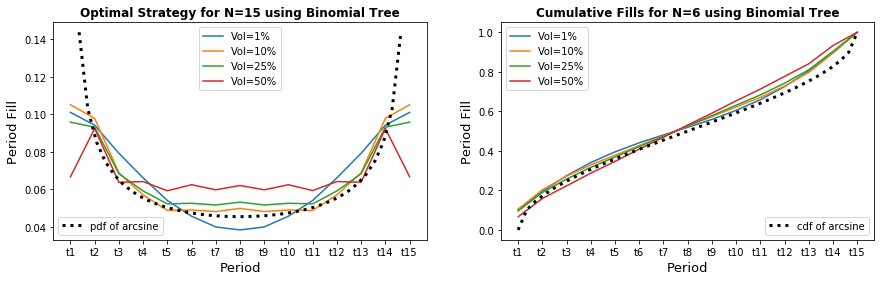

In [341]:
# Optimal Strategy for N=15

# min std fills
a2 = [0.1011, 0.0943, 0.0793, 0.0662, 0.0541, 0.0457, 0.04, 0.0384, 0.04,   0.0457,
 0.0541, 0.0662, 0.0793, 0.0943, 0.1011]
b2 = [0.1052, 0.0979, 0.0689, 0.0571, 0.0488, 0.049, 0.0482, 0.0499, 0.0482, 0.049,
 0.0488, 0.0571, 0.0689, 0.0979, 0.1052]
c2 = [0.0959, 0.0932, 0.0684, 0.0592, 0.0523, 0.0526, 0.0517, 0.0532, 0.0517, 0.0526,
 0.0523, 0.0592, 0.0684, 0.0932, 0.0959]
d2 = [0.0667, 0.0925, 0.0638, 0.0642, 0.0593, 0.0625, 0.0598, 0.0621, 0.0598, 0.0625,
 0.0594, 0.0642, 0.0639, 0.0925, 0.0668]
data1 = {'Vol=1%': a2,
       'Vol=10%': b2,
       'Vol=25%': c2,
       'Vol=50%': d2}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])
# cumulative fills
a22 = list(accumulate(a2))
b22 = list(accumulate(b2))
c22 = list(accumulate(c2))
d22 = list(accumulate(d2))
data2 = {'Vol=1%': a22,
        'Vol=10%': b22,
        'Vol=25%': c22,
        'Vol=50%': d22}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])

# Plot for Optimal Strategy when N=15
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*14, arcsine.pdf(x) / 14,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=15 using Binomial Tree', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*14, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=6 using Binomial Tree', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 

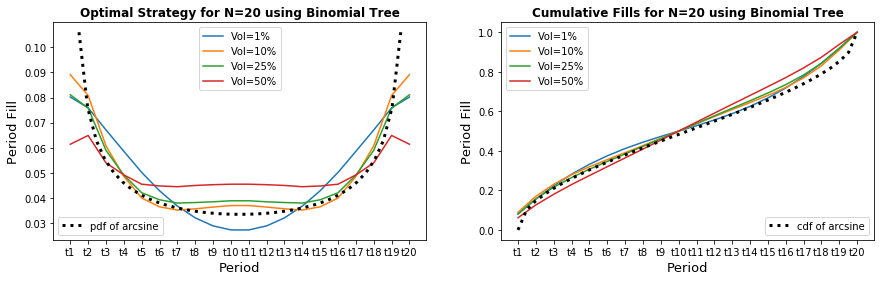

In [340]:
# Optimal Strategy for N=20

# min std fills
a3 = [0.0802, 0.0759, 0.0671, 0.0586, 0.0502, 0.0429, 0.0368, 0.0321, 0.0289, 0.0273,
 0.0273, 0.0289, 0.0321, 0.0368, 0.0429, 0.0502, 0.0586, 0.0671, 0.0759, 0.0802]
b3 = [0.0891, 0.0808, 0.0608, 0.0486, 0.04,   0.0365, 0.0352, 0.0357, 0.0364, 0.037,
 0.037,  0.0364, 0.0357, 0.0352, 0.0365, 0.04,   0.0486, 0.0608, 0.0808, 0.0891]
c3 = [0.0811, 0.0758, 0.059,  0.0491, 0.0421, 0.0393, 0.038,  0.0382, 0.0385, 0.0389,
 0.0389, 0.0385, 0.0382, 0.038,  0.0393, 0.0421, 0.0491, 0.059,  0.0758, 0.0811]
d3 = [0.0614, 0.0649, 0.054,  0.0492, 0.0455, 0.0448, 0.0445, 0.045,  0.0453, 0.0455,
 0.0455, 0.0453, 0.045,  0.0445, 0.0448, 0.0455, 0.0492, 0.054,  0.0649, 0.0614]
data1 = {'Vol=1%': a3,
       'Vol=10%': b3,
       'Vol=25%': c3,
       'Vol=50%': d3}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# cumulative fills
a33 = list(accumulate(a3))
b33 = list(accumulate(b3))
c33 = list(accumulate(c3))
d33 = list(accumulate(d3))
data2 = {'Vol=1%': a33,
        'Vol=10%': b33,
        'Vol=25%': c33,
        'Vol=50%': d33}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# Plot for Optimal Strategy when N=20
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*19, arcsine.pdf(x) / 19,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=20 using Binomial Tree', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*19, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=20 using Binomial Tree', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 





## 2. Generate possible paths by GBM using Monte Carlo

### a) Generate all paths

In [395]:
N = 6
T = 1 
sigma = 0.5
r = 0.5 * (sigma**2)
S0 = 1
M = 2**N # of paths
dt = T / N
stock_path = np.zeros((2**N, N+1))
np.random.seed(1)

def MC_GBM(T, N, r, sigma, S0):
    for i in range(M):
        S = [S0]
        dW = np.sqrt(dt) * np.random.standard_normal(N)
        for j in range(N):
            S.append(S[j] * np.exp((r-0.5*sigma**2)*dt + sigma*dW[j]))
        stock_path[i,:] = S
    return stock_path

# all possible paths by MC
stock_paths2 = MC_GBM(T, N, r, sigma, S0)
# print(stock_paths2.round(4))

In [396]:
# minimum price during the period
stock_paths2 = stock_paths2[:, 1:]
min_price2 = stock_paths2.min(axis=1)
# print('Min price: \n', np.round(min_price2, 4))

### b) Minimizing function

In [397]:
import scipy.optimize as sco
P2 = stock_paths2
m2 = min_price2

# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P2*w).sum(axis=1) / m2).std()

# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))

# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])

# implement function
result4 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result4)
strategy4 = result4['x'].round(4)
print('Min Std Regret for 50% Vol: \n', strategy4)

Min Std Regret for 50% Vol: 
 [0.     0.366  0.1422 0.2385 0.1646 0.0888]


### c) Plot for optimal strategy

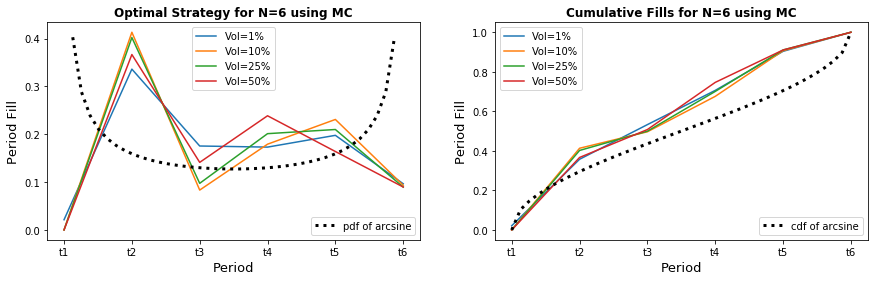

In [339]:
from itertools import accumulate
# Optimal Strategy for N=6

# min std fills
a1 = [0.0213, 0.3361, 0.1754, 0.1731, 0.1977, 0.0965]
b1 = [0, 0.4132, 0.0833, 0.1792, 0.2309, 0.0933]
c1 = [0, 0.4021, 0.0974, 0.2012, 0.2099, 0.0895]
d1 = [0, 0.3666, 0.1412, 0.2386, 0.1639, 0.0897]
data1 = {'Vol=1%': a1,
       'Vol=10%': b1,
       'Vol=25%': c1,
       'Vol=50%': d1}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6'])

# cumulative fills
a11 = list(accumulate(a1))
b11 = list(accumulate(b1))
c11 = list(accumulate(c1))
d11 = list(accumulate(d1))
data2 = {'Vol=1%': a11,
       'Vol=10%': b11,
       'Vol=25%': c11,
       'Vol=50%': d11}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6'])


#Plot for optimal fills and cumulative fills
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*5, arcsine.pdf(x) / 5,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'], loc=4)
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=6 using MC', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*5, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=6 using MC', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 

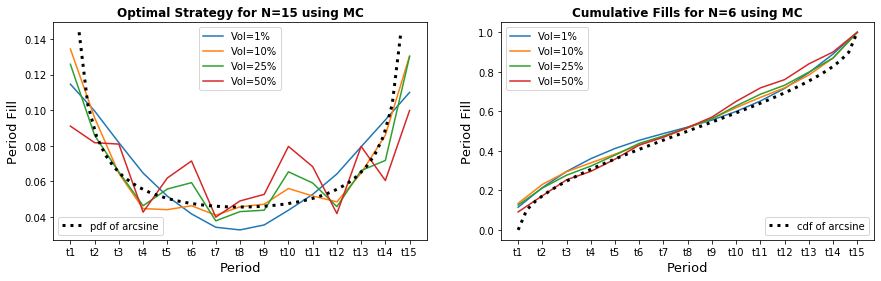

In [309]:
# Optimal Strategy for N=15

# min std fills
a2 = [0.1146, 0.0995, 0.0817, 0.0646, 0.0516, 0.0416, 0.0341, 0.0326, 0.0354, 0.0437,
 0.0526, 0.0641, 0.0794, 0.0945, 0.11]
b2 = [0.1344, 0.0957, 0.0644, 0.0446, 0.044,  0.0462, 0.0409, 0.0456, 0.0471, 0.0559,
 0.0517, 0.0484, 0.0646, 0.0859, 0.1305]
c2 = [0.1258, 0.0858, 0.0652, 0.0462, 0.0556, 0.0592, 0.0377, 0.0429, 0.0437, 0.0653,
 0.059, 0.0457, 0.066,  0.0717, 0.1302]
d2 = [0.091, 0.0817, 0.0809, 0.0426, 0.0618, 0.0714, 0.0398, 0.0489, 0.0526, 0.0796,
 0.0682, 0.0418, 0.0796, 0.0604, 0.0998]
data1 = {'Vol=1%': a2,
       'Vol=10%': b2,
       'Vol=25%': c2,
       'Vol=50%': d2}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])
# cumulative fills
a22 = list(accumulate(a2))
b22 = list(accumulate(b2))
c22 = list(accumulate(c2))
d22 = list(accumulate(d2))
data2 = {'Vol=1%': a22,
        'Vol=10%': b22,
        'Vol=25%': c22,
        'Vol=50%': d22}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])

# Plot for Optimal Strategy when N=15
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*14, arcsine.pdf(x) / 14,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=15 using MC', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*14, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=6 using MC', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 

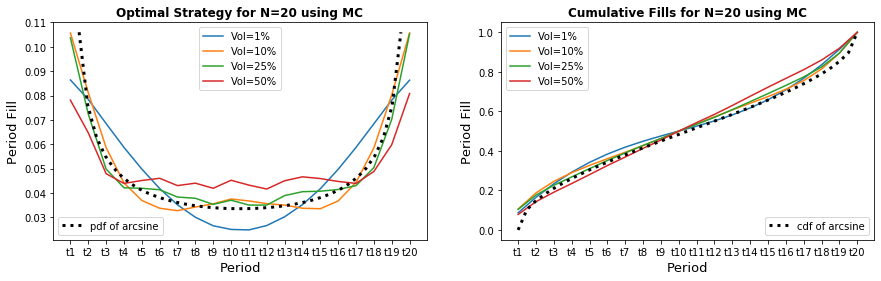

In [331]:
# Optimal Strategy for N=20

# min std fills
a3 = [0.0864, 0.0784, 0.0685, 0.0587, 0.0498, 0.0418, 0.0351, 0.03, 0.0265, 0.025,
 0.0248, 0.0266, 0.0302, 0.0352, 0.0417, 0.0497, 0.0587, 0.0684, 0.0781, 0.0863]
b3 = [0.1057, 0.0812, 0.0586, 0.0441, 0.0369, 0.0337, 0.0327, 0.0342, 0.0355, 0.0375,
 0.0367, 0.0356, 0.035,  0.0337, 0.0335, 0.0367, 0.0443, 0.0585, 0.0803, 0.1057]
c3 = [0.1037, 0.0724, 0.0498, 0.0421, 0.0419, 0.0413, 0.0383, 0.0378, 0.0353, 0.037,
 0.035,  0.035,  0.0389, 0.0405, 0.0407, 0.0414, 0.043,  0.0504, 0.0702, 0.1053]
d3 = [0.0781, 0.0647, 0.0479, 0.0439, 0.0451, 0.046,  0.043,  0.044,  0.0419, 0.0452,
 0.0432, 0.0416, 0.045,  0.0466, 0.0459, 0.0447, 0.0439, 0.0488, 0.0598, 0.0808]
data1 = {'Vol=1%': a3,
       'Vol=10%': b3,
       'Vol=25%': c3,
       'Vol=50%': d3}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# cumulative fills
a33 = list(accumulate(a3))
b33 = list(accumulate(b3))
c33 = list(accumulate(c3))
d33 = list(accumulate(d3))
data2 = {'Vol=1%': a33,
        'Vol=10%': b33,
        'Vol=25%': c33,
        'Vol=50%': d33}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])


# Plot for Optimal Strategy when N=20
plt.subplot(1,2,1)
plot1 = plt.plot(df1, label = df1.columns)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*19, arcsine.pdf(x) / 19,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=20 using MC', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*19, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=20 using MC', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2)

### d) Explore the effect of drift

In [475]:
N = 15
T = 1 
sigma = 0.5
r = 0.26
S0 = 1
M = 2**N # of paths
dt = T / N
stock_path = np.zeros((2**N, N+1))
np.random.seed(1)

stock_paths22 = MC_GBM(T, N, r, sigma, S0)
# print(stock_paths22)
# minimum price during the period
stock_paths22 = stock_paths22[:, 1:]
min_price22 = stock_paths22.min(axis=1)
# print('Min price: \n', np.round(min_price2, 4))

In [476]:
import scipy.optimize as sco
P22 = stock_paths22
m22 = min_price22

# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P22*w).sum(axis=1) / m22).std()
# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})
# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))
# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])
# implement function
result44 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result44)
strategy44 = result44['x'].round(4)
print('Min Std Regret: \n', strategy44)

Min Std Regret: 
 [0.1513 0.1081 0.0918 0.0548 0.0699 0.0759 0.0415 0.0458 0.0505 0.0683
 0.0548 0.032  0.0602 0.0406 0.0544]


*Clearly, as we fixed sigma and N, when $r\gg\frac{1}{2}\times\sigma^2$ our strategy will buy more at the beginning and when $r\ll\frac{1}{2}\times\sigma^2$ we buy more at the end.*  

## 3. Generate possible paths by BM using Monte Carlo


### a) generate all paths

In [477]:
N = 15
T = 1 
sigma = 0.5
r = 0 # driftless for BM
S0 = 1
M = 2**N # of paths
dt = T / N
stock_path = np.zeros((2**N, N+1))
np.random.seed(1)

def MC_BM(T, N, r, sigma, S0):
    for i in range(M):
        S = [S0]
        dW = np.sqrt(dt) * np.random.standard_normal(N)
        for j in range(N):
            S.append(S[j] * np.exp((r-0.5*sigma**2)*dt + sigma*dW[j]))
        stock_path[i,:] = S
    return stock_path

# all possible paths by MC
stock_paths3 = MC_BM(T, N, r, sigma, S0)
# print(stock_paths3round(4))

In [478]:
# minimum price during the period
stock_paths3 = stock_paths3[:, 1:]
min_price3 = stock_paths3.min(axis=1)
# print('Min price: \n', np.round(min_price2, 4))

### b) Minmizing function

In [479]:
import scipy.optimize as sco
P3 = stock_paths3
m3 = min_price3

# Minimize std of regret
def min_regret(w):
    w = np.array(w)
    return ((P3*w).sum(axis=1) / m3).std()

# constraints：sum of weights are 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1})

# boundaries：each weight is bewtween 0 and 1
bnds = tuple((0,1) for j in range(N))

# guess initial weights
ini = np.array([1/N] * N)
# ini = np.array([0.18,0.181,0.12,0.12,0.181,0.18])

# implement function
result5 = sco.minimize(fun=min_regret, x0=ini, method='SLSQP', constraints=cons, bounds=bnds)
# print(result4)
strategy5 = result5['x'].round(4)
print('Min Std Regret for 50% Vol: \n', strategy5)

Min Std Regret for 50% Vol: 
 [0.0498 0.0579 0.0661 0.0312 0.0508 0.0643 0.0378 0.0501 0.0497 0.0827
 0.0752 0.0489 0.0988 0.0815 0.1552]


### c) Plot for optimal strategy

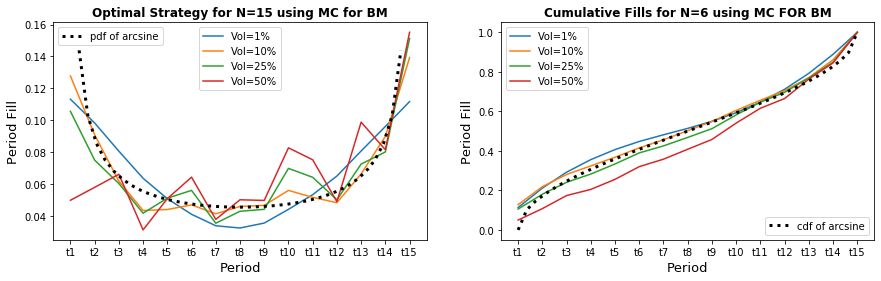

In [384]:
# Optimal Strategy for N=15

# min std fills
a2 = [0.1132, 0.0983, 0.0806, 0.0636, 0.0508, 0.041,  0.0338, 0.0324, 0.0355, 0.0441,
 0.0533, 0.065,  0.0807, 0.0961, 0.1117]
b2 = [0.1278, 0.0909, 0.0618, 0.0434, 0.044,  0.0469, 0.0413, 0.0459, 0.0466, 0.056,
 0.0516, 0.0483, 0.0663, 0.0899, 0.1393]
c2 = [0.1056, 0.075,  0.0603, 0.0417, 0.0511, 0.056,  0.0354, 0.0429, 0.0441, 0.0698,
 0.0642, 0.0501, 0.0725, 0.0801, 0.1512]
d2 = [0.0498, 0.0579, 0.0661, 0.0312, 0.0508, 0.0643, 0.0378, 0.0501, 0.0497, 0.0827,
 0.0752, 0.0489, 0.0988, 0.0815, 0.1552]
data1 = {'Vol=1%': a2,
       'Vol=10%': b2,
       'Vol=25%': c2,
       'Vol=50%': d2}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])
# cumulative fills
a22 = list(accumulate(a2))
b22 = list(accumulate(b2))
c22 = list(accumulate(c2))
d22 = list(accumulate(d2))
data2 = {'Vol=1%': a22,
        'Vol=10%': b22,
        'Vol=25%': c22,
        'Vol=50%': d22}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15'])

# Plot for Optimal Strategy when N=15
plt.subplot(1,2,1)
plot1 = plt.plot(df1)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*14, arcsine.pdf(x) / 14,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=15 using MC for BM', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*14, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=6 using MC FOR BM', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2) 

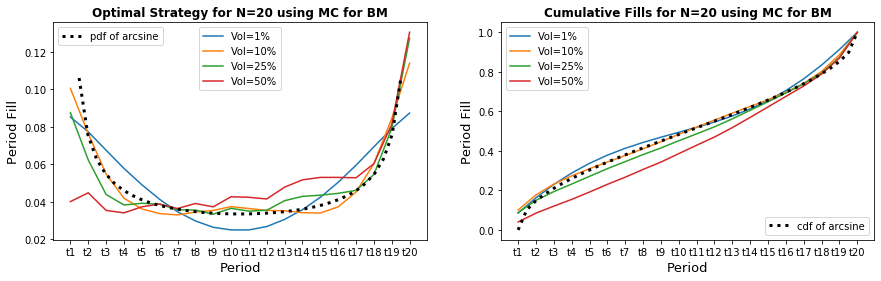

In [383]:
# Optimal Strategy for N=20

# min std fills
a3 = [0.0852, 0.0773, 0.0675, 0.0578, 0.0491, 0.0413, 0.0347, 0.0298, 0.0264, 0.025,
 0.025,  0.0268, 0.0306, 0.0358, 0.0424, 0.0504, 0.0595, 0.0693, 0.079,  0.0873]
b3 = [0.1005, 0.0763, 0.0548, 0.0419, 0.0362, 0.0337, 0.033,  0.0345, 0.0354, 0.0374,
 0.0364, 0.0354, 0.0352, 0.0342, 0.034,  0.0373, 0.0452, 0.0603, 0.0844, 0.1139]
c3 = [0.0875, 0.0623, 0.0439, 0.0383, 0.0392, 0.0387, 0.0357, 0.0356, 0.0334, 0.0365,
 0.035,  0.0355, 0.0406, 0.0429, 0.0435, 0.0445, 0.0461, 0.0545, 0.0791, 0.1272]
d3 = [0.0401, 0.0448, 0.0354, 0.0341, 0.0373, 0.0388, 0.0364, 0.0391, 0.0373, 0.0427,
 0.0424, 0.0415, 0.0478, 0.0517, 0.053,  0.053,  0.0528, 0.0603, 0.0813, 0.1304]
data1 = {'Vol=1%': a3,
       'Vol=10%': b3,
       'Vol=25%': c3,
       'Vol=50%': d3}
df1 = pd.DataFrame(data1, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])

# cumulative fills
a33 = list(accumulate(a3))
b33 = list(accumulate(b3))
c33 = list(accumulate(c3))
d33 = list(accumulate(d3))
data2 = {'Vol=1%': a33,
        'Vol=10%': b33,
        'Vol=25%': c33,
        'Vol=50%': d33}
df2 = pd.DataFrame(data2, index=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11',
                            't12','t13','t14','t15','t16','t17','t18','t19','t20'])


# Plot for Optimal Strategy when N=20
plt.subplot(1,2,1)
plot1 = plt.plot(df1, label = df1.columns)
l1 = plt.legend(plot1, df1.columns)
# pdf of arcsine distribution
x = np.linspace(0, 1, 40)
arcsine_pdf = plt.plot(x*19, arcsine.pdf(x) / 19,'k:', label='pdf of arcsine', linewidth=3)
plt.legend(arcsine_pdf, ['pdf of arcsine'])
plt.gca().add_artist(l1)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Optimal Strategy for N=20 using MC for BM', fontweight="bold")

plt.subplot(1,2,2)
plot2 = plt.plot(df2)
l2 = plt.legend(plot2, df2.columns)
# cdf of arcsien disyribution
arcsine_cdf = plt.plot(x*19, arcsine.cdf(x), 'k:', label = 'cdf of arcsine', linewidth=3)
plt.legend(arcsine_cdf, ['cdf of arcsine'], loc=4)
plt.gca().add_artist(l2)
plt.xlabel('Period', fontsize=13)
plt.ylabel('Period Fill', fontsize=13)
plt.title('Cumulative Fills for N=20 using MC for BM', fontweight="bold")
plt.subplots_adjust(left=0.1, right=2)